# Data Cleaning
Author Brian Tam, 11/02/2020

This notebook is used to clean the [Bible corpus](https://www.kaggle.com/oswinrh/bible) as an intermediate setup to prep it for moding.
Specifically this initial process explored the different translations and their individual advantages:
1. Total vocabulary (for the purposes of dimensionality reduction)
2. How true to the original Greek/Hebrew is the translation

For a detailed breakdown look [here](https://commonwaychurch.com/wp-content/uploads/2015/11/bibletranslationchart.pdf)

In [1]:
# Get pandas and postgres to work together
import psycopg2 as pg
import pandas as pd
import numpy as np
import pickle 

# Panda overides for visuals
# pd.set_option('display.max_colwidth', 1)

# Import spacy to do NLP
import spacy
parser = spacy.load('en_core_web_sm')

# Import sklearn to do CountVectorizing
from sklearn.feature_extraction.text import CountVectorizer
# Create TF-IDF document-term matrix
from sklearn.feature_extraction.text import TfidfVectorizer

# For plotting reasons
import matplotlib.pyplot as plt

# Topic Modeling
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity

# Text Preprocessing
import re
import string

# LDA
from sklearn import datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# logging (set to INFO)
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# CorEx
import scipy.sparse as ss

from sklearn.feature_extraction.text import CountVectorizer
from sklearn import datasets

from corextopic import corextopic as ct
from corextopic import vis_topic as vt

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from utilities.text_cleaning import spacy_tokenizer, display_topics

# KJV translation

In [13]:
kjv=pd.read_csv('data/bible_databases-master/t_kjv.csv')

In [14]:
kjv

,field,field.1,field.2,field.3,field.4
0,1001001,1,1,1,In the beginning God created the heaven and th...
1,1001002,1,1,2,"And the earth was without form, and void; and ..."
2,1001003,1,1,3,"And God said, Let there be light: and there wa..."
3,1001004,1,1,4,"And God saw the light, that it was good: and G..."
4,1001005,1,1,5,"And God called the light Day, and the darkness..."
...,...,...,...,...,...
31098,66022017,66,22,17,"And the Spirit and the bride say, Come. And le..."
31099,66022018,66,22,18,For I testify unto every man that heareth the ...
31100,66022019,66,22,19,And if any man shall take away from the words ...
31101,66022020,66,22,20,"He which testifieth these things saith, Surely..."


In [15]:
kjv['cleaned']=kjv['field.4'].apply(spacy_tokenizer)

In [18]:
kjv

,field,field.1,field.2,field.3,field.4,cleaned
0,1001001,1,1,1,In the beginning God created the heaven and the earth.,begin god create heaven earth
1,1001002,1,1,2,"And the earth was without form, and void; and darkness was upon the face of the deep. And the Spirit of God moved upon the face of the waters.",earth form void darkness face deep spirit god face water
2,1001003,1,1,3,"And God said, Let there be light: and there was light.",god let light light
3,1001004,1,1,4,"And God saw the light, that it was good: and God divided the light from the darkness.",god light good god divide light darkness
4,1001005,1,1,5,"And God called the light Day, and the darkness he called Night. And the evening and the morning were the first day.",god light day darkness night evening morning day
...,...,...,...,...,...,...
31098,66022017,66,22,17,"And the Spirit and the bride say, Come. And let him that heareth say, Come. And let him that is athirst come. And whosoever will, let him take the water of life freely.",spirit bride come let heareth come let athirst come whosoever let water life freely
31099,66022018,66,22,18,"For I testify unto every man that heareth the words of the prophecy of this book, If any man shall add unto these things, God shall add unto him the plagues that are written in this book:",testify unto man heareth word prophecy book man shall add unto thing god shall add unto plague write book
31100,66022019,66,22,19,"And if any man shall take away from the words of the book of this prophecy, God shall take away his part out of the book of life, and out of the holy city, and from the things which are written in this book.",man shall away word book prophecy god shall away book life holy city thing write book
31101,66022020,66,22,20,"He which testifieth these things saith, Surely I come quickly. Amen. Even so, come, Lord Jesus.",testifieth thing saith surely come quickly amen come lord jesus


In [99]:
# Split the data into X and y data sets
X = kjv.cleaned

In [100]:
tfidf1 = TfidfVectorizer()
X_train_tfidf1 = tfidf1.fit_transform(X)
len(pd.DataFrame(X_train_tfidf1.toarray(), columns=tfidf1.get_feature_names()).columns)

10114

In [175]:
pd.DataFrame(X_train_tfidf1.toarray(), columns=tfidf1.get_feature_names())

,aaron,abaddon,abagtha,abana,abarim,abba,abda,abdeel,abdi,abdiel,...,zorah,zorathites,zorites,zuar,zuph,zuphite,zur,zuriel,zurishaddai,zuzim
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31098,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
# Acronynms: Latent Semantic Analysis (LSA) is just another name for 
#  Signular Value Decomposition (SVD) applied to Natural Language Processing (NLP)

TopicModel = NMF(10)
doc_topic = TopicModel.fit_transform(pd.DataFrame(X_train_tfidf1.toarray(), columns=tfidf1.get_feature_names()))

In [70]:
topics = display_topics(TopicModel, tfidf1.get_feature_names(), 3)

In [71]:
topic_word = pd.DataFrame(TopicModel.components_.round(3),
             index =  topics,
             columns = tfidf1.get_feature_names())
topic_word.head(10)

,aaron,abarim,abase,abate,abdon,abednego,abel,abhor,abhorreth,abia,...,zippor,zoan,zoar,zobah,zohar,zophar,zorah,zuar,zur,zurishaddai
"unto, moses, spake",0.340,0.006,0.000,0.001,0.000,0.000,0.010,0.000,0.001,0.000,...,0.003,0.000,0.002,0.000,0.000,0.000,0.002,0.000,0.000,0.000
"thou, shalt, hast",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.012,0.000,0.000,...,0.001,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000
"shall, offering, day",0.013,0.000,0.006,0.001,0.000,0.000,0.000,0.005,0.001,0.000,...,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000
"ye, know, thing",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.004,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000
"man, let, thing",0.000,0.000,0.001,0.000,0.000,0.004,0.000,0.003,0.001,0.000,...,0.000,0.000,0.000,0.001,0.000,0.000,0.003,0.000,0.000,0.000
"lord, god, hath",0.000,0.000,0.001,0.000,0.000,0.001,0.000,0.008,0.001,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
"thy, thee, thine",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
"son, father, daughter",0.151,0.000,0.000,0.000,0.010,0.000,0.002,0.003,0.000,0.007,...,0.013,0.002,0.000,0.007,0.009,0.000,0.000,0.010,0.005,0.009
"come, king, day",0.000,0.000,0.000,0.002,0.000,0.005,0.001,0.000,0.000,0.000,...,0.001,0.003,0.004,0.005,0.000,0.001,0.002,0.000,0.001,0.000
"child, israel, land",0.088,0.006,0.000,0.000,0.002,0.000,0.001,0.001,0.000,0.000,...,0.001,0.001,0.000,0.003,0.000,0.000,0.001,0.002,0.000,0.004


In [72]:
X_test_topic_array = TopicModel.transform(pd.DataFrame(X_train_tfidf1.toarray(), columns=tfidf1.get_feature_names()))

In [73]:
X_train_topics = pd.DataFrame(doc_topic.round(5),
             index = X.index,
             columns = topics)

In [74]:
X_train_topics

,"unto, moses, spake","thou, shalt, hast","shall, offering, day","ye, know, thing","man, let, thing","lord, god, hath","thy, thee, thine","son, father, daughter","come, king, day","child, israel, land"
0,0.00000,0.00175,0.00142,0.00000,0.00317,0.04888,0.00000,0.00045,0.00145,0.0
1,0.00000,0.00185,0.00323,0.00000,0.00455,0.03265,0.00225,0.00000,0.00264,0.0
2,0.00000,0.00000,0.00000,0.00000,0.00775,0.04174,0.00503,0.00000,0.00334,0.0
3,0.00000,0.00020,0.00070,0.00006,0.00191,0.06165,0.00059,0.00000,0.00000,0.0
4,0.00000,0.00253,0.00617,0.00216,0.00000,0.03070,0.00014,0.00000,0.03233,0.0
...,...,...,...,...,...,...,...,...,...,...
31098,0.00000,0.00000,0.00000,0.00000,0.01136,0.00000,0.00543,0.00000,0.08676,0.0
31099,0.03990,0.00000,0.04265,0.00000,0.05106,0.00909,0.00000,0.00000,0.00370,0.0
31100,0.00010,0.00048,0.05143,0.00237,0.03170,0.02147,0.00000,0.00000,0.01544,0.0
31101,0.00250,0.00176,0.00000,0.00526,0.00072,0.03674,0.00000,0.00000,0.07178,0.0


In [67]:
X_train_topics.values.argmax(axis=1)

array([31, 31, 20, ...,  2,  8, 23])

# BBE translation

Bibe in basic English was a translations done by Professor S. H. Hooke following the standards of "Basic English", last revised in 1965
This implies a couple of restricitons:
- Basic English restricts Vocabulary to 1000 words 
    - 850 base words
    - 100 additional words for poetry
    - 50 additional words related to biblical context

In [3]:
# import the default 850 basic english words 
basic_english = pd.read_pickle('basic_english_list')
len(basic_english)

850

In [4]:
# Import BBE translation to df
bbe = pd.read_csv('data/bible_databases-master/t_bbe.csv')

In [5]:
#remove lemmetize, remove stop-words and punctuation
bbe['cleaned']=bbe['field.4'].apply(spacy_tokenizer)

In [6]:
bbe

,field,field.1,field.2,field.3,field.4,cleaned
0,1001001,1,1,1,At the first God made the heaven and the earth.,god heaven earth
1,1001002,1,1,2,And the earth was waste and without form; and ...,earth waste form dark face deep spirit god fac...
2,1001003,1,1,3,"And God said, Let there be light: and there wa...",god let light light
3,1001004,1,1,4,"And God, looking on the light, saw that it was...",god look light good god division light dark
4,1001005,1,1,5,"Naming the light, Day, and the dark, Night. An...",light day dark night evening morning day
...,...,...,...,...,...,...
31098,66022017,66,22,17,"And the Spirit and the bride say, Come. And le...",spirit bride come let ear come let need come l...
31099,66022018,66,22,18,For I say to every man to whose ears have come...,man ear come word prophet book man addition go...
31100,66022019,66,22,19,And if any man takes away from the words of th...,man away word book god away tree life holy tow...
31101,66022020,66,22,20,"He who gives witness to these things says, Tru...",witness thing truly come quickly come lord jesus


# **NO** stop_words **YES** basic_english 

In [23]:
# Define what you'll feed into the vectorizer as X
X = bbe['cleaned']
tfidf = TfidfVectorizer()
bbe_cleaned_tfidf = tfidf.fit_transform(X)
bbe_cleaned_tfidf_df = pd.DataFrame(bbe_cleaned_tfidf.toarray(), columns=tfidf.get_feature_names())
print('Vocab size: ', len(bbe_cleaned_tfidf_df.columns))

/Users/briantam/opt/anaconda3/envs/metis/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Vocab size:  4926


/Users/briantam/opt/anaconda3/envs/metis/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Vocab Distribution of BBE')

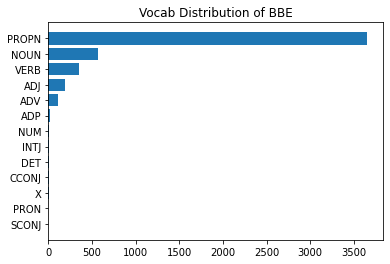

In [24]:
mytolkens = parser(' '.join(list(bbe_cleaned_tfidf_df.columns)))
tolken_list = [tolken.pos_ for tolken in mytolkens]
BBE_POS_df = pd.DataFrame([(x, tolken_list.count(x)) for x in set(tolken_list)]).sort_values(1)
plt.barh(BBE_POS_df[0],BBE_POS_df[1])
plt.title('Vocab Distribution of BBE')

# Trying other stop_word filters

### **NO** stop_words **NO** basic_english 

In [14]:
# Define what you'll feed into the vectorizer as X
X = bbe['cleaned']
tfidf = TfidfVectorizer(stop_words = basic_english)
bbe_cleaned_tfidf = tfidf.fit_transform(X)
bbe_cleaned_tfidf = pd.DataFrame(bbe_cleaned_tfidf.toarray(), columns=tfidf.get_feature_names())
print('Vocab size: ', len(bbe_cleaned_tfidf.columns))

Vocab size:  4244


In [8]:
parser = spacy.load('en_core_web_sm')

Text(0.5, 1.0, 'Vocab Distribution of BBE')

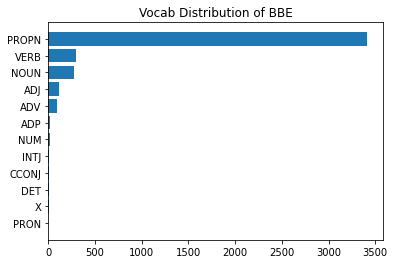

In [9]:
mytolkens = parser(' '.join(list(bbe_cleaned_tfidf.columns)))
tolken_list = [tolken.pos_ for tolken in mytolkens]
BBE_POS_df = pd.DataFrame([(x, tolken_list.count(x)) for x in set(tolken_list)]).sort_values(1)
plt.barh(BBE_POS_df[0],BBE_POS_df[1])
plt.title('Vocab Distribution of BBE')

### **YES** stop_words **NO** basic_english 

In [168]:
# Define what you'll feed into the vectorizer as X
X = bbe['cleaned']
tfidf = TfidfVectorizer(max_df=.9 stop_words = basic_english)
X_train_tfidf1 = tfidf1.fit_transform(X)

len(pd.DataFrame(X_train_tfidf1.toarray(), columns=tfidf1.get_feature_names()).columns)

/Users/briantam/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['gray', 'grey', 'plough', 'plow'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


4335

In [169]:
bbe_tfidf = pd.DataFrame(X_train_tfidf1.toarray(), columns=tfidf1.get_feature_names())

In [170]:
mytolkens = parser(' '.join(list(bbe_tfidf.columns)))

In [171]:
tolken_list = [tolken.pos_ for tolken in mytolkens]

In [172]:
BBE_POS_df = pd.DataFrame([(x, tolken_list.count(x)) for x in set(tolken_list)]).sort_values(1)
BBE_POS_df

,0,1
1,SCONJ,1
0,X,2
13,AUX,3
5,INTJ,6
7,CCONJ,6
11,ADP,19
3,DET,20
9,NUM,28
12,PRON,29
10,ADV,108


<BarContainer object of 14 artists>

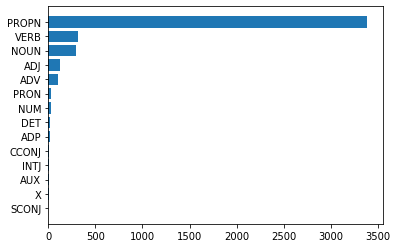

In [173]:
plt.barh(BBE_POS_df[0],BBE_POS_df[1])

### **YES** stop_words **YES** basic_english 

In [45]:
# Define what you'll feed into the vectorizer as X
X = bbe['field.4']
tfidf = TfidfVectorizer()
bbe_tfidf = tfidf.fit_transform(X)

print('Vocab Size: ', len(pd.DataFrame(bbe_tfidf.toarray(), columns=tfidf.get_feature_names()).columns))

Vocab Size:  5982


Text(0.5, 1.0, 'Vocab Distribution of BBE')

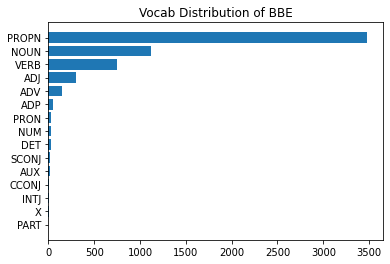

In [44]:
bbe_tfidf = pd.DataFrame(bbe_tfidf.toarray(), columns=tfidf.get_feature_names())
mytolkens = parser(' '.join(list(bbe_tfidf.columns)))
tolken_list = [tolken.pos_ for tolken in mytolkens]
BBE_POS_df = pd.DataFrame([(x, tolken_list.count(x)) for x in set(tolken_list)]).sort_values(1)
plt.barh(BBE_POS_df[0],BBE_POS_df[1])
plt.title('Vocab Distribution of BBE')

# WordClouds

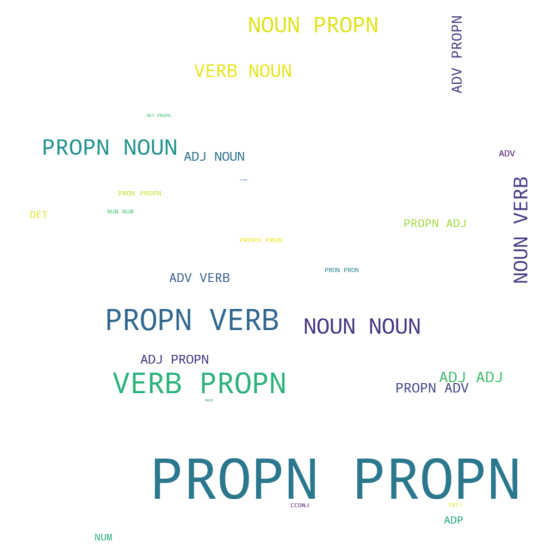

In [135]:
from wordcloud import WordCloud
text = ' '.join([tolken.pos_ for tolken in mytolkens])

# Generate a word cloud image
wordcloud = WordCloud(width = 1000, height = 1000,
                background_color ="rgba(255, 255, 255, 0)", mode="RGBA").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig(f'POS_BBE_not_in_BE.png',bbox_inches = 'tight', pad_inches = .25)
plt.show()

# pyLDAvis

In [26]:
# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_components=20, random_state=0)
lda_tfidf.fit(bbe_cleaned_tfidf)

/Users/briantam/opt/anaconda3/envs/metis/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(n_components=20, random_state=0)

## pyLDAvis


Let's use [pyLDAvis](http://bl.ocks.org/AlessandraSozzi/raw/ce1ace56e4aed6f2d614ae2243aab5a5/) to see our topics, and to see if they match up with our expectations.

* The left panel visualizes the topics as circles in the two-dimensional plane whose centres are determined by computing the Jensen–Shannon divergence between topics, and then by using [multidimensional scaling](https://en.wikipedia.org/wiki/Multidimensional_scaling) to project the inter-topic distances onto two dimensions. Each topic’s overall prevalence is encoded using the areas of the circles.

* The right panel depicts a horizontal bar chart whose bars represent the individual terms that are the most useful for interpreting the currently selected topic on the left. A pair of overlaid bars represent both the corpus-wide frequency of a given term as well as the topic-specific frequency of the term.

* The λ slider allows to rank the terms according to term relevance. By default, the terms of a topic are ranked in decreasing order according their topic-specific probability ( λ = 1 ). Moving the slider allows to adjust the rank of terms based on much discriminatory (or "relevant") are for the specific topic. The suggested “optimal” value of λ is 0.6. [Small values of λ (near 0) highlight potentially rare, but exclusive terms for the selected topic, and large values of λ (near 1) highlight frequent, but not necessarily exclusive, terms for the selected topic.](http://www.kennyshirley.com/LDAvis/)

In [55]:
bbe.iloc[16102:16106]

/Users/briantam/opt/anaconda3/envs/metis/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,field,field.1,field.2,field.3,field.4,cleaned,cleaner
16102,19123004,19,123,4,For long enough have men of pride made sport o...,long man pride sport soul,long man pride sport soul
16103,19124001,19,124,1,&lt;A Song of the going up. Of David.&gt; If i...,lt;a song david.&gt lord let israel,lt a song david gt lord let israel
16104,19124002,19,124,2,If it had not been the Lord who was on our sid...,lord man come,lord man come
16105,19124003,19,124,3,They would have made a meal of us while still ...,meal live heat wrath,meal live heat wrath


In [53]:
alphanumeric = lambda x: re.sub('\w*\d\w*', '', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

/Users/briantam/opt/anaconda3/envs/metis/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:1: DeprecationWarning: invalid escape sequence \w
<>:1: DeprecationWarning: invalid escape sequence \w
<ipython-input-53-d23f2e3ff782>:1: DeprecationWarning: invalid escape sequence \w
  alphanumeric = lambda x: re.sub('\w*\d\w*', '', x)


In [54]:
bbe['cleaner']= bbe.cleaned.map(punc_lower)

/Users/briantam/opt/anaconda3/envs/metis/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
bbe_cleaned_tfidf_df['lt'].sort_values()

/Users/briantam/opt/anaconda3/envs/metis/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0        0.000000
20759    0.000000
20758    0.000000
20757    0.000000
20756    0.000000
           ...   
14252    0.409364
16019    0.409437
15379    0.414420
16090    0.462188
16103    0.493215
Name: lt, Length: 31103, dtype: float64

In [27]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

pyLDAvis.sklearn.prepare(lda_tfidf, bbe_cleaned_tfidf, tfidf)

/Users/briantam/opt/anaconda3/envs/metis/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
10     0.215121  0.019656       1        1  8.405990
4      0.157462 -0.025087       2        1  6.892719
13     0.112614 -0.029502       3        1  6.244506
12     0.136709  0.011784       4        1  6.017357
7      0.001533 -0.131172       5        1  5.616853
1     -0.026420  0.149759       6        1  5.611093
14    -0.131301  0.048090       7        1  5.038186
0     -0.111202 -0.155354       8        1  4.982229
2      0.076378 -0.049492       9        1  4.918046
5      0.094601  0.048595      10        1  4.883259
3      0.011182  0.072460      11        1  4.822778
11    -0.015982  0.049208      12        1  4.599659
8     -0.177436  0.067570      13        1  4.391088
9     -0.072733  0.139093      14        1  4.217869
6     -0.104522 -0.127488      15        1  4.087289
16    -0.137147  0.052739      16        1  4.074377
19    -0.028242 -0.119094      17        1  4.055443
18     0.036017  0.114965      18        1  4.011399
15    -0.025005 -0.052957      19        1  3.725256
17    -0.011628 -0.083772      20        1  3.404606, topic_info=          Term        Freq       Total Category  logprob  loglift
3182  offering  316.000000  316.000000  Default  30.0000  30.0000
2990     moses  279.000000  279.000000  Default  29.0000  29.0000
4398  thousand  158.000000  158.000000  Default  28.0000  28.0000
4785      year  236.000000  236.000000  Default  27.0000  27.0000
1656      gold  132.000000  132.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
4108       sin   19.348858  257.869173  Topic20  -4.9569   0.7902
4166       son   20.914436  632.806924  Topic20  -4.8791  -0.0297
4758      word   19.889030  522.589212  Topic20  -4.9293   0.1114
2762       man   17.218160  890.350748  Topic20  -5.0735  -0.5656
3837      send   16.771014  462.349465  Topic20  -5.0998   0.0634

[1271 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         5  0.647980    aaron
0         7  0.186405    aaron
0         9  0.017753    aaron
0        11  0.008876    aaron
0        13  0.079888    aaron
...     ...       ...      ...
4835     19  0.054148  zebulun
4875     17  0.897486     ziba
4891      9  0.903971      zin
4905      3  0.756460     zoan
4916     12  0.922806    zorah

[5009 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 5, 14, 13, 8, 2, 15, 1, 3, 6, 4, 12, 9, 10, 7, 17, 20, 19, 16, 18])

The topics for our TFIDFVectorizer LDA also appear to match up with our newsgroups categories, though not as cleanly:

* Topic 1: Defining good and evil, the law
* Topic 2: Jesus
* Topic 3: Israel
* Topic 4: Sin
* Topic 5: Moses and Eygpt
* Topic 6: Creation, nature
* Topic 7: Sacrifice
* Topic 8: War
* Topic 9: Evangelizing
* Topic 10: Suffering
* Topic 11: Health
* Topic 12: Plants
* Topic 13:

Overall, it appears that with minimal text preprocessing, LDA was still able to extract the relevant topics from our corpus. It appears as though some miscellaneous terms are still floating around in our topics - additional text preprocessing, particularly stop word removal, is needed!

Let's revisit the CountVectorizer LDA model. We can adjust multidimensional scaling to get "cleaner" topic bubbles.

In [28]:
pyLDAvis.sklearn.prepare(lda_tfidf, bbe_cleaned_tfidf, tfidf, mds='mmds')

/Users/briantam/opt/anaconda3/envs/metis/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
10    -0.032105 -0.286523       1        1  8.405990
4     -0.140618 -0.231219       2        1  6.892719
13    -0.083629 -0.099243       3        1  6.244506
12    -0.023142 -0.200264       4        1  6.017357
7     -0.068677  0.041796       5        1  5.616853
1     -0.166526  0.085717       6        1  5.611093
14    -0.235579  0.204347       7        1  5.038186
0     -0.272345 -0.092810       8        1  4.982229
2      0.054343 -0.134571       9        1  4.918046
5      0.112270 -0.244874      10        1  4.883259
3      0.090487 -0.010670      11        1  4.822778
11     0.043954  0.148005      12        1  4.599659
8     -0.351865  0.059948      13        1  4.391088
9      0.155402  0.235472      14        1  4.217869
6     -0.107381  0.263002      15        1  4.087289
16     0.041288  0.318900      16        1  4.074377
19     0.261455 -0.046627      17        1  4.055443
18     0.236619 -0.185776      18        1  4.011399
15     0.219957  0.041933      19        1  3.725256
17     0.266092  0.133456      20        1  3.404606, topic_info=          Term        Freq       Total Category  logprob  loglift
3182  offering  316.000000  316.000000  Default  30.0000  30.0000
2990     moses  279.000000  279.000000  Default  29.0000  29.0000
4398  thousand  158.000000  158.000000  Default  28.0000  28.0000
4785      year  236.000000  236.000000  Default  27.0000  27.0000
1656      gold  132.000000  132.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
4108       sin   19.348858  257.869173  Topic20  -4.9569   0.7902
4166       son   20.914436  632.806924  Topic20  -4.8791  -0.0297
4758      word   19.889030  522.589212  Topic20  -4.9293   0.1114
2762       man   17.218160  890.350748  Topic20  -5.0735  -0.5656
3837      send   16.771014  462.349465  Topic20  -5.0998   0.0634

[1271 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         5  0.647980    aaron
0         7  0.186405    aaron
0         9  0.017753    aaron
0        11  0.008876    aaron
0        13  0.079888    aaron
...     ...       ...      ...
4835     19  0.054148  zebulun
4875     17  0.897486     ziba
4891      9  0.903971      zin
4905      3  0.756460     zoan
4916     12  0.922806    zorah

[5009 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 5, 14, 13, 8, 2, 15, 1, 3, 6, 4, 12, 9, 10, 7, 17, 20, 19, 16, 18])

# CorEx

In [61]:
# n_hidden is the number of topics
# words is your list of words used in your corpus
# I recommend adding docs=df.data to make it easier to check which sentences are in each resulting topic
topic_model = ct.Corex(n_hidden=6, words=list(np.asarray(tfidf.get_feature_names())), seed=1)
topic_model.fit(X_train_tfidf, words=list(np.asarray(tfidf.get_feature_names())), docs=bbe['field.4'])

/Users/briantam/opt/anaconda3/envs/metis/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Other Versions

### WEB

In [8]:
web = pd.read_csv('data/bible_databases-master/t_web.csv')
# Assign the 
X = web['field.4']

In [9]:
# Create TF-IDF of the array of words
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X)
len(pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf.get_feature_names()).columns)

12511

### ASV

### DBY

### WBT

### YLT